In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.utils import resample

In [7]:
np.random.seed(42)

In [9]:
n=50
cutoff_day=25
days=np.arange(1,n+1)

In [15]:
outcome= np.where(
    days < cutoff_day,
    50 + 0.3*days + np.random.normal(0,3,n),
    50 + 0.3 * days +19 + np.random.normal(0,3,n)
)

In [17]:
# Create dataframe
df=pd.DataFrame( { 'day':days,
                  'running_var': days-cutoff_day, # Centered running variable
                   'post': (days >= cutoff_day).astype(int),
                  'outcome':outcome})

In [19]:
model = smf.ols('outcome ~ running_var + post',data=df).fit()
treatment_effect=model.params['post']
ci=model.conf_int().loc['post']

In [21]:
ci

0    16.947867
1    23.324704
Name: post, dtype: float64

In [23]:
treatment_effect

20.136285618871867

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     565.0
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.35e-33
Time:                        13:38:42   Log-Likelihood:                -120.96
No. Observations:                  50   AIC:                             247.9
Df Residuals:                      47   BIC:                             253.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.4575      0.893     63.195      

In [35]:
# Calculate bootsrtap CI for the treatment effect
effect_boot=[]
for i in range(1000):
    sample=resample(df) # can use sample as well
    model=smf.ols('outcome ~ running_var + post',data=sample).fit()
    effect_boot.append(model.params['post'])

In [36]:
bootstrap_ci=np.percentile(effect_boot,[2.5,50,97.5])
bootstrap_ci

array([16.47086797, 20.18644067, 23.7089848 ])

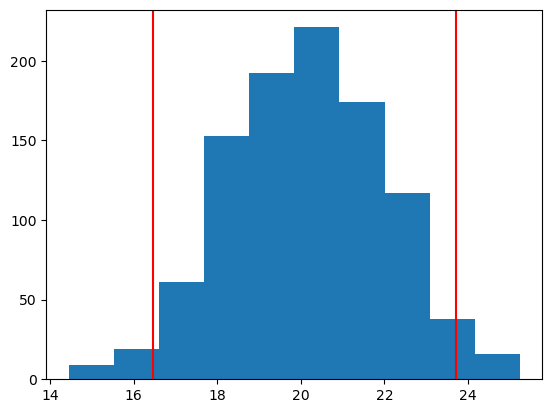

In [51]:
plt.hist(effect_boot)
plt.axvline(bootstrap_ci[0],color='red')
plt.axvline(bootstrap_ci[2],color='red')
plt.show()

In [53]:
# Different ways to sample a dataframe